# CAR INSURANCE FRAUD DETECTIONS

By :

>Hussain Alhadab

>Ahmed Alonaizi

>Mohammed Alhamoud

>Feras Alyahya


In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

from collections import OrderedDict

import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, log_loss, accuracy_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# !conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

# !conda install -y -c conda-forge xgboost
import xgboost

pd.set_option('display.max_columns', 35)

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset = pd.read_excel('Dataset.xlsx')

In [3]:
dataset.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Feb            1   Saturday   Honda        Urban           Monday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus   Age          Fault  \
0          Jan                   1  Female        Single  21.0  Policy Holder   
1          Jan                   4    Male        Single  34.0  Policy Holder   
2          Nov                   2    Male       Married  47.0  Policy Holder   
3          Jul                   1    Male       Married  65.0    Third Party   
4          Feb                   3    Male       Married  36.0    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300           1.0         more than 30   
1             2         15         400           4.0         more than 30   
2             3          7         400           3.0         more than 30   
3             4          4         400           2.0         more than 30   
4             7         14         400           1.0         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30                  1      7 years          36 to 40   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External              1 to 2   

  AddressChange_Claim NumberOfCars  Year BasePolicy     ClaimSize  
0              1 year       3 to 4  1994  Liability  55526.069421  
1           no change    1 vehicle  1994  Collision  59294.455571  
2           no change    1 vehicle  1994  Collision  71756.941320  
3           no change    1 vehicle  1994  Liability   7584.153493  
4           no change    1 vehicle  1994  Collision  98545.374339

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [5]:
dataset.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [6]:
dataset.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            11565
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
ClaimSize 

# Corrlation heatmap

<AxesSubplot:>

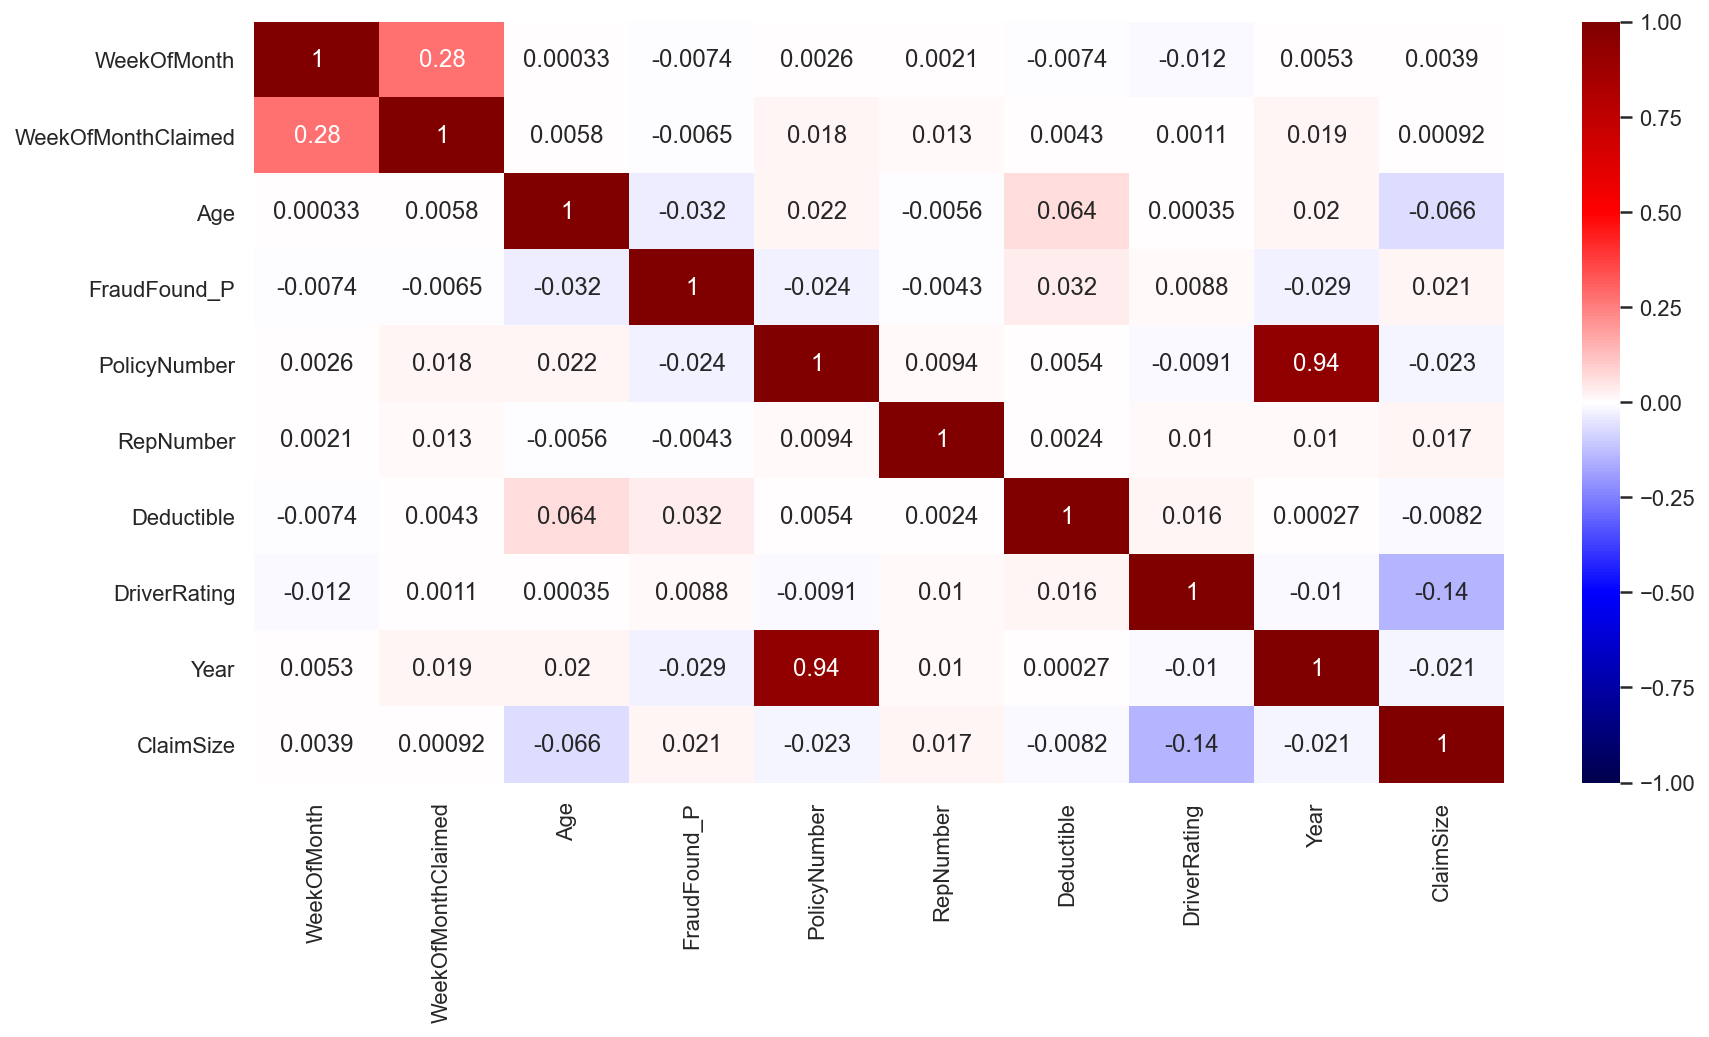

In [7]:
plt.figure(figsize=(14, 7))
sns.heatmap(dataset.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# Percentage of Fraud in Dataset

In [8]:
print('Fraud class is %{:.2} of dataset ({} data points)'.format(
    np.mean(dataset.FraudFound_P) * 100,
    len(np.where(dataset.FraudFound_P == 1)[0])))

Fraud class is %5.9 of dataset (685 data points)


# Display Scores & Confusion Matrix function 

In [9]:
def printScores(model, X_test, y_test, on='Test', logLoss=True):
    if logLoss:
        print(f'{type(model).__name__} on {on} Data;', 'Test F1: %.3f, Test AUC: %.3f, Log-Loss: %.3f' % \
        (f1_score(y_test, model.predict(X_test)), roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
        log_loss(y_test, model.predict_proba(X_test))))
        print()    

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(dpi=150)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap=plt.cm.Blues,
                square=True,
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
   
    plt.tick_params(axis='y', rotation=0)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')


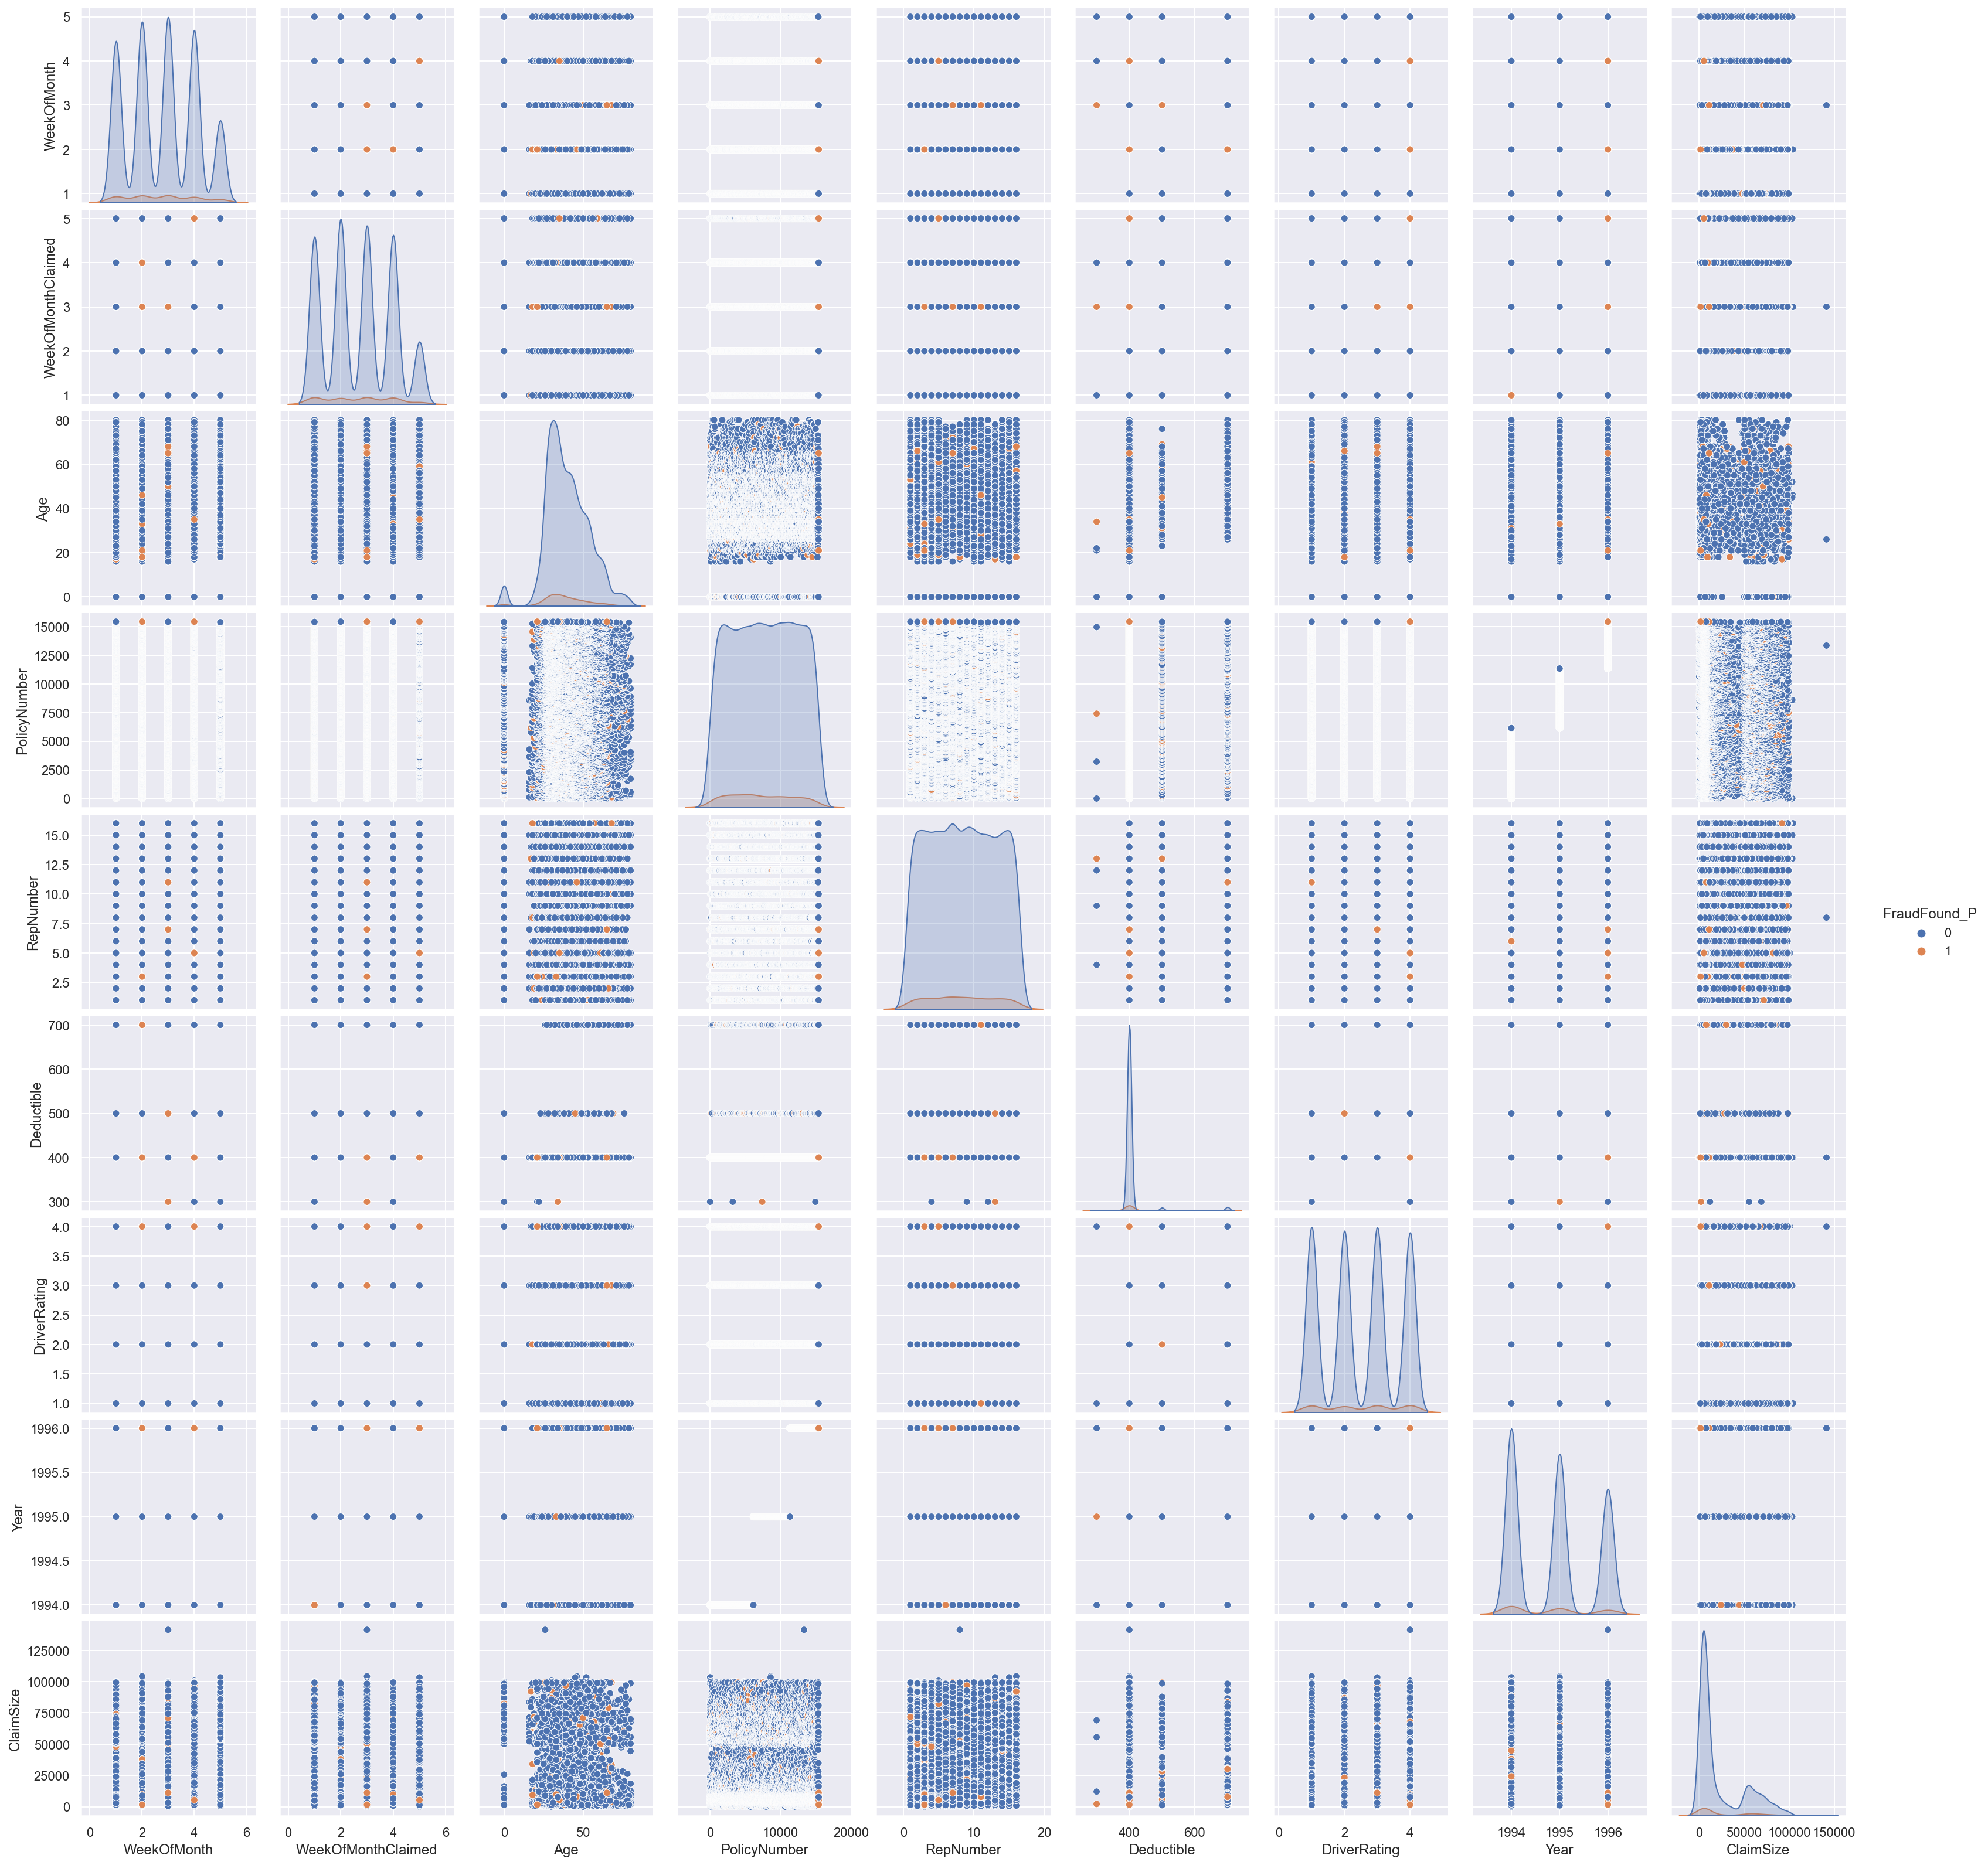

In [10]:
#train_df = X1_train.copy()
#train_df["FraudFound_P"] = y1_train
sns.pairplot(dataset, hue="FraudFound_P")

In [11]:
score_results = {}
f1_score_dict = {}

# Logistic Regression

>Test 1 using all features


LogisticRegression on Test Data; Test F1: 0.000, Test AUC: 0.717, Log-Loss: 0.208

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.00      0.00      0.00       137

    accuracy                           0.94      2311
   macro avg       0.47      0.50      0.48      2311
weighted avg       0.88      0.94      0.91      2311



C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 900x600 with 0 Axes>

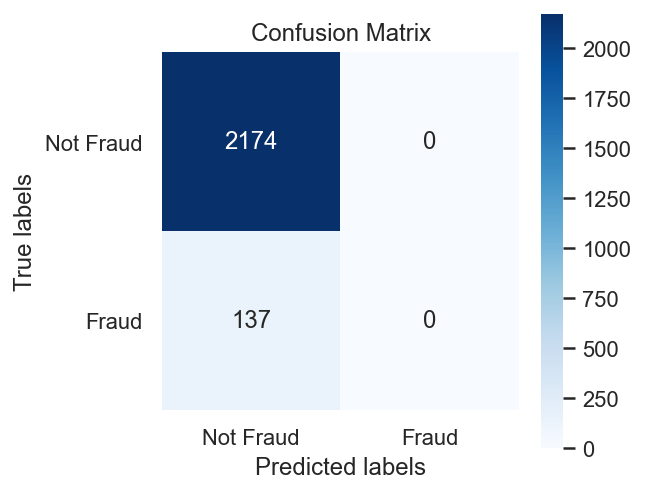

In [12]:
#test 1
df1 = dataset.copy()

#drop null values
df1 = df1.dropna()

#All features 
features_list = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize']


#Detrimine X & Y target 
X1 = df1.loc[:, features_list]
y1 = df1.loc[:, 'FraudFound_P'].values.ravel()

#gender
X1.Sex = np.where(X1.Sex == 'Male', 1, 0)


#convert all catogrical values  to dummies
X1 = pd.get_dummies(X1, drop_first=True)


#Splite X,Y Train & test 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=.2,stratify=y1,random_state=101)



#fit LogisticRegression model
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X1_train, y1_train)

# Display all scores (precision-recall-f1-score-support)

printScores(lr1, X1_test, y1_test)



# Logistic Regression


>Test 2 using some of the features

LogisticRegression on Test Data; Test F1: 0.000, Test AUC: 0.502, Log-Loss: 0.228

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.00      0.00      0.00       137

    accuracy                           0.94      2311
   macro avg       0.47      0.50      0.48      2311
weighted avg       0.88      0.94      0.91      2311



C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 900x600 with 0 Axes>

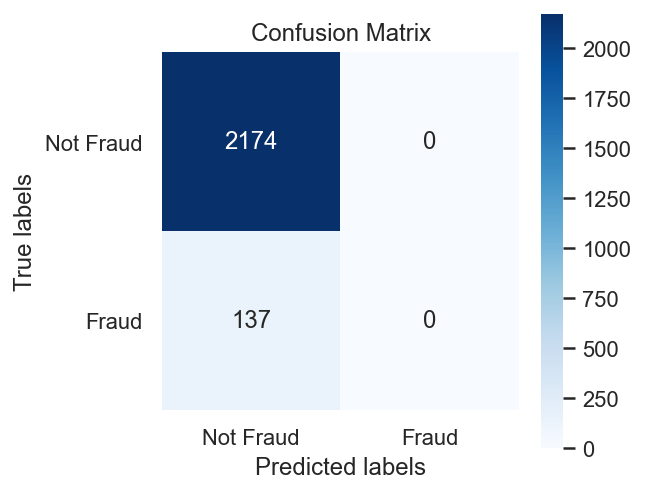

In [13]:
#test 2
df2 = dataset.copy()

#drop null values
df2 = df2.dropna()

#All features 
features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]


#Detrimine X & Y target 
X2 = df2.loc[:, features_list]
y2 = df2.loc[:, 'FraudFound_P'].values.ravel()

#gender
X2.Sex = np.where(X2.Sex == 'Male', 1, 0)


#convert all catogrical values  to dummies
X2 = pd.get_dummies(X2, drop_first=True)


#Splite X,Y Train & test 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=.2,stratify=y2,random_state=101)


#fit LogisticRegression model
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X2_train, y2_train)

# Display all scores (precision-recall-f1-score-support)

printScores(lr2, X2_test, y2_test)

# Logistic Regression - Dimensionality Reduction



>Test 3 using some of the features with dimensionality reduction 



LogisticRegression on Test Data; Test F1: 0.028, Test AUC: 0.782, Log-Loss: 0.195

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.40      0.01      0.03       137

    accuracy                           0.94      2311
   macro avg       0.67      0.51      0.50      2311
weighted avg       0.91      0.94      0.91      2311



<Figure size 900x600 with 0 Axes>

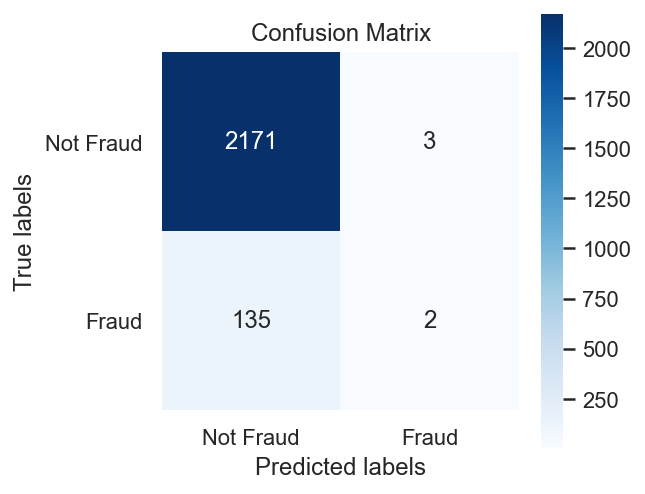

In [14]:
#test 3

df3 = dataset.copy()

#drop null values
df3 = df3.dropna()

#All features 
features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

#Detrimine X & Y target 
X3 = df3.loc[:, features_list]
y3 = df3.loc[:, 'FraudFound_P'].values.ravel()

#gender
X3.Sex = np.where(X3.Sex == 'Male', 1, 0)


#convert all catogrical values  to dummies
X3 = pd.get_dummies(X3, drop_first=True)

#
#print(" X  before dimensionality reduction")
#X3

# Linear dimensionality reduction using Singular Value Decomposition
pca = PCA(n_components='mle', whiten='True')
X3 = pca.fit(X3).transform(X3)

#
#print(" X  After dimensionality reduction")
#X33=pd.DataFrame(X3)
#X33

#Splite X,Y Train & test 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=.2,stratify=y3,random_state=101)

#fit LogisticRegression model
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(X3_train, y3_train)

# Display all scores (precision-recall-f1-score-support)

printScores(lr3, X3_test, y3_test)

## Modify weight of Target

LogisticRegression on Test Data; Test F1: 0.173, Test AUC: 0.783, Log-Loss: 0.265

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2174
           1       0.20      0.15      0.17       137

    accuracy                           0.91      2311
   macro avg       0.57      0.56      0.56      2311
weighted avg       0.90      0.91      0.91      2311



<Figure size 900x600 with 0 Axes>

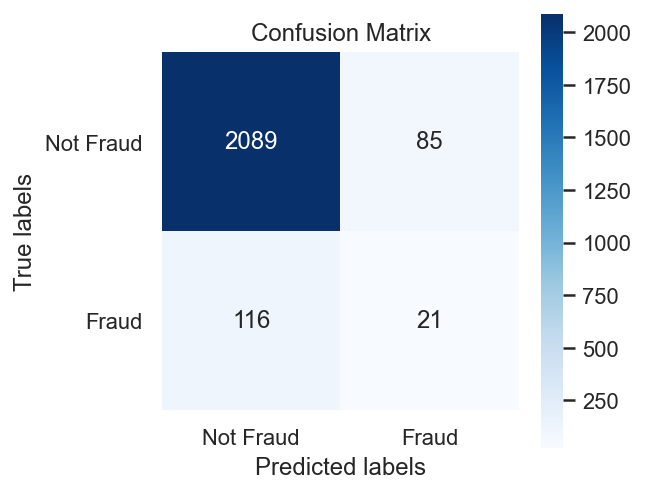

In [15]:
lr4 = LogisticRegression(C=1, max_iter=1000, class_weight={0: 0.2, 1: 0.8})
lr4.fit(X3_train, y3_train)
printScores(lr4, X3_test, y3_test)

## Modify weight of Target

LogisticRegression on Test Data; Test F1: 0.217, Test AUC: 0.783, Log-Loss: 0.400

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2174
           1       0.13      0.58      0.22       137

    accuracy                           0.75      2311
   macro avg       0.55      0.67      0.54      2311
weighted avg       0.92      0.75      0.82      2311



<Figure size 900x600 with 0 Axes>

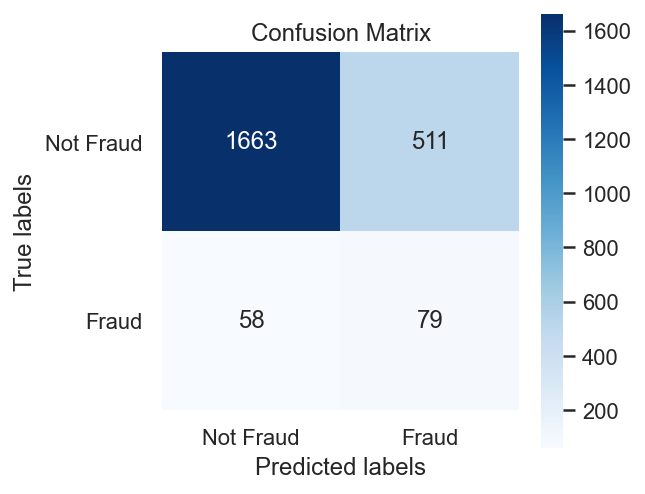

In [16]:
lr5 = LogisticRegression(C=1, max_iter=1000, class_weight={0: 0.1, 1: 0.9})
lr5.fit(X3_train, y3_train)
printScores(lr5, X3_test, y3_test)

## Handing Imbalanced Classes
Note: SMOTE is one of the famous oversampling techniques and is very effective in handling class imbalance. The idea is to combine SMOTE with some undersampling techniques (ENN, Tomek) to increase the effectiveness of handling the imbalanced class.
- Over-sampling techniques: Oversampling techniques refer to create artificial minority class points. Some oversampling techniques are Random Over Sampling, ADASYN, SMOTE, etc.
- Under-sampling techniques: Undersampling techniques refer to remove majority class points. Some undersampling techniques are ENN, Random Under Sampling, TomekLinks, etc.
- https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn

LogisticRegression on Test Data; Test F1: 0.924, Test AUC: 0.975, Log-Loss: 0.203

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2077
           1       0.93      0.92      0.92      2077

    accuracy                           0.92      4154
   macro avg       0.92      0.92      0.92      4154
weighted avg       0.92      0.92      0.92      4154



<Figure size 900x600 with 0 Axes>

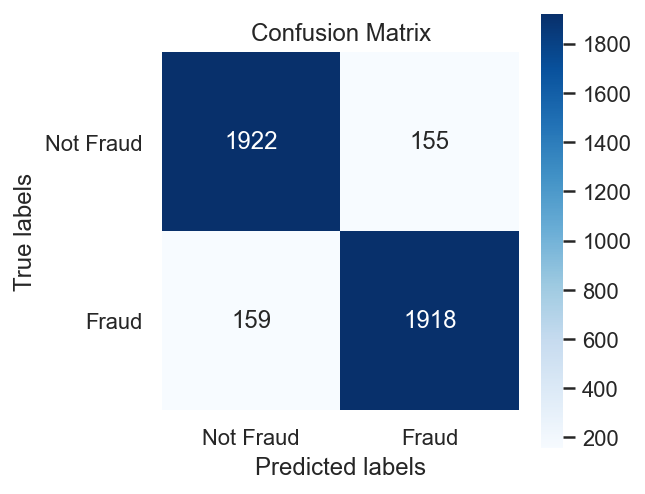

In [19]:
# test 4

df4 = dataset.copy()

df4 = df4.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X4 = df4.loc[:, features_list]
y4 = df4.loc[:, 'FraudFound_P'].values.ravel()

X4.Sex = np.where(X4.Sex == 'Male', 1, 0)
X4 = pd.get_dummies(X4, drop_first=True)

# Linear dimensionality reduction using Singular Value Decomposition
#pca = PCA(n_components='mle', whiten='True')
#X2 = pca.fit(X2).transform(X2)

# Linear dimensionality reduction by means of truncated singular value decomposition
#svd = TruncatedSVD(n_components = 60)
#X2 = svd.fit(X2).transform(X2)

#### Synthetic Minority Oversampling Technique (SMOTE): to over-sample minority classes
#X2_resampled,y2_resampled = SMOTE(random_state = 3).fit_resample(X2,y2)

#### Adaptive Synthetic (ADASYN) sampling method: to over-sample minority classes
#X2_resampled,y2_resampled = ADASYN(random_state = 3).fit_resample(X2,y2)

#### Over-sampling using SMOTE and cleaning using Tomek links
X4_resampled, y4_resampled = SMOTETomek(random_state=3).fit_resample(X4, y4)

#### Over-sampling using SMOTE and cleaning using ENN algorithm
#X2_resampled,y2_resampled = SMOTEENN(random_state=3).fit_resample(X2,y2)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4_resampled,
                                                        y4_resampled,
                                                        test_size=.2,
                                                        stratify=y4_resampled,
                                                        random_state=101)

lr6 = LogisticRegression(max_iter=1000)
lr6.fit(X4_train, y4_train)
printScores(lr6, X4_test, y4_test)

score_results[type(lr6).__name__] = lr6.score(X4_test, y4_test)
f1_score_dict[type(lr6).__name__] = f1_score(y4_test, lr6.predict(X4_test))

# After resampling

In [20]:
#number of data points after resampling
print('number of data points after resampling')
len(X4_resampled), len(X4), len(X4_resampled)/len(X4)

number of data points after resampling


(20766, 11554, 1.7972996364895275)

In [21]:
print('Fraud class after resampling is %{}'.format(np.mean(y4_resampled)*100))

Fraud class after resampling is %50.0


In [ ]:
plt.figure(figsize=(10, 30))
perm_importance = permutation_importance(lr4, X2_test, y2_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X2_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# KNN model 


KNeighborsClassifier on Test Data; Test F1: 0.000, Test AUC: 0.540, Log-Loss: 1.276



C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aso19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.00      0.00      0.00       137

    accuracy                           0.94      2311
   macro avg       0.47      0.50      0.48      2311
weighted avg       0.88      0.94      0.91      2311



<Figure size 900x600 with 0 Axes>

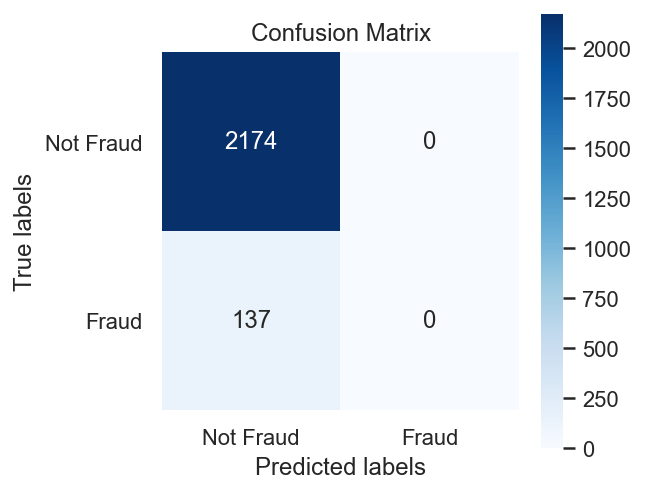

In [22]:
df5 = dataset.copy()

df5 = df5.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]


X5 = df5.loc[:, features_list]
y5 = df5.loc[:, 'FraudFound_P'].values.ravel()


X5.Sex = np.where(X5.Sex == 'Male', 1, 0)
X5 = pd.get_dummies(X5, drop_first=True)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,
                                                        test_size=.2,
                                                        stratify=y5,
                                                        random_state=101)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X5_train,y5_train)
#print('#')
#print(knn.score(X5_test, y5_test))
#
#Training the model
#knn.fit(x_train, y_train)
#Predict testing set
#y_pred = knn.predict(X5_test)
#Check performance using accuracy
#print('accuracy_score')
#print(accuracy_score(y5_test, y_pred))
#Check performance using roc
#print('roc_score')
#print(roc_auc_score(y5_test, y_pred))
#
printScores(knn, X5_test, y5_test)

# KNN model
>After resampling & GridSearchCV

Model best params are: {'n_neighbors': 1} and the best score is 0.9815926335603811
GridSearchCV on Test Data; Test F1: 0.987, Test AUC: 0.984, Log-Loss: 0.525

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1264
           1       0.98      0.99      0.99      1630

    accuracy                           0.98      2894
   macro avg       0.99      0.98      0.98      2894
weighted avg       0.98      0.98      0.98      2894



<Figure size 900x600 with 0 Axes>

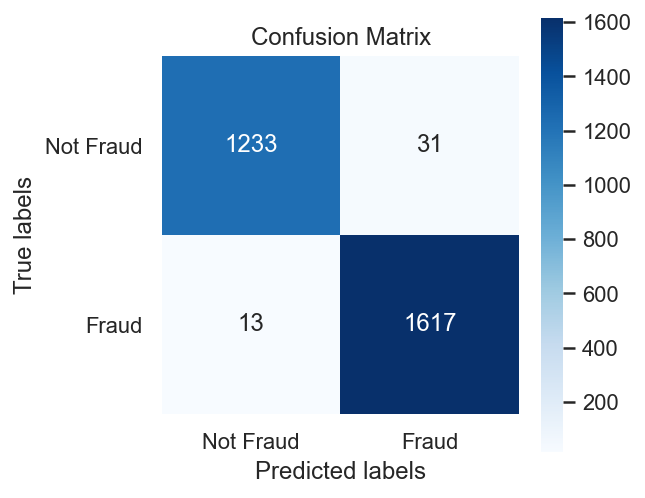

In [25]:
df8 = dataset.copy()

df8 = df8.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X8 = df8.loc[:, features_list]
y8 = df8.loc[:, 'FraudFound_P'].values.ravel()

X8.Sex = np.where(X8.Sex == 'Male', 1, 0)
X8 = pd.get_dummies(X8, drop_first=True)

#### Over-sampling using SMOTE and cleaning using ENN (Edited Nearest Neighbours) algorithm
X8_resampled, y8_resampled = SMOTEENN(random_state=3).fit_resample(X8, y8)

X8_train, X8_test, y8_train, y8_test = train_test_split(X8_resampled,
                                                        y8_resampled,
                                                        test_size=.2,stratify=y8_resampled,
                                                        random_state=101)

knn = KNeighborsClassifier(n_neighbors=10)
#knn.fit(X8_train, y8_train)


params = [{'n_neighbors': range(1, 10)}]

clf = GridSearchCV(knn, params, cv = 10, scoring='accuracy')

clf.fit(X8_train, y8_train)
print(f"Model best params are: {clf.best_params_} and the best score is {clf.best_score_}")

printScores(clf, X8_test, y8_test)

score_results['KNN'] = clf.score(X8_test, y8_test)
f1_score_dict['KNN'] = f1_score(y8_test, clf.predict(X8_test))

# Random Forest

>Test 1 using some of the features

RandomForestClassifier on Test Data; Test F1: 0.122, Test AUC: 0.799, Log-Loss: 0.253

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2174
           1       0.82      0.07      0.12       137

    accuracy                           0.94      2311
   macro avg       0.88      0.53      0.55      2311
weighted avg       0.94      0.94      0.92      2311



<Figure size 900x600 with 0 Axes>

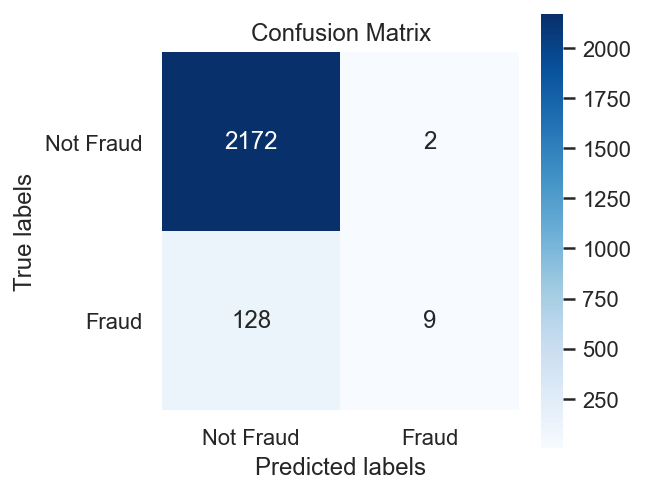

In [26]:
df6 = dataset.copy()

df6 = df6.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X6 = df6.loc[:, features_list]
y6 = df6.loc[:, 'FraudFound_P'].values.ravel()

X6.Sex = np.where(X6.Sex == 'Male', 1, 0)
X6 = pd.get_dummies(X6, drop_first=True)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6,
                                                        y6,
                                                        test_size=.2,
                                                        stratify=y6,
                                                        random_state=101)

RC = RandomForestClassifier(n_estimators=100, max_features=10, random_state=50)

RC.fit(X6_train, y6_train)
printScores(RC, X6_test, y6_test)

# Random Forest

>Test 2 using some of the features with Over-sampling using SMOTE

RandomForestClassifier on Test Data; Test F1: 0.967, Test AUC: 0.993, Log-Loss: 0.120

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1264
           1       0.98      0.95      0.97      1630

    accuracy                           0.96      2894
   macro avg       0.96      0.96      0.96      2894
weighted avg       0.96      0.96      0.96      2894



<Figure size 900x600 with 0 Axes>

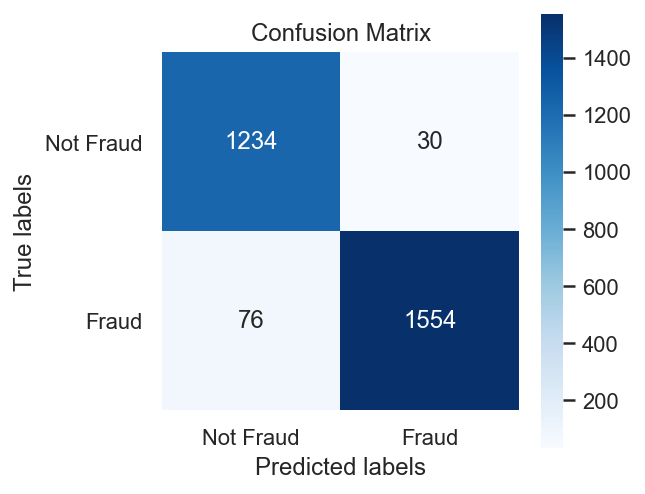

In [27]:
df11 = dataset.copy()

df11 = df11.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X11 = df11.loc[:, features_list]
y11 = df11.loc[:, 'FraudFound_P'].values.ravel()

X11.Sex = np.where(X11.Sex == 'Male', 1, 0)
X11 = pd.get_dummies(X11, drop_first=True)

#### Over-sampling using SMOTE and cleaning using ENN (Edited Nearest Neighbours) algorithm
X11_resampled, y11_resampled = SMOTEENN(random_state=3).fit_resample(X11, y11)

X11_train, X11_test, y11_train, y11_test = train_test_split(X11_resampled,
                                                        y11_resampled,
                                                        test_size=.2,stratify=y11_resampled,
                                                        random_state=101)


RC = RandomForestClassifier(n_estimators=100, max_features=10, random_state=50)

RC.fit(X11_train, y11_train)
printScores(RC, X11_test, y11_test)




score_results['Random Forest'] = RC.score(X11_test, y11_test)
f1_score_dict['Random Forest'] = f1_score(y11_test, RC.predict(X11_test))

In [28]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]




# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


pprint(random_grid)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Random Forest 

>Test 3 using some of the features with RandomizedSearchCV & Over-sampling using SMOTE

1
2
3
Fitting 3 folds for each of 2 candidates, totalling 6 fits
RandomizedSearchCV on Test Data; Test F1: 0.964, Test AUC: 0.992, Log-Loss: 0.152

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1264
           1       0.98      0.95      0.96      1630

    accuracy                           0.96      2894
   macro avg       0.96      0.96      0.96      2894
weighted avg       0.96      0.96      0.96      2894



<Figure size 900x600 with 0 Axes>

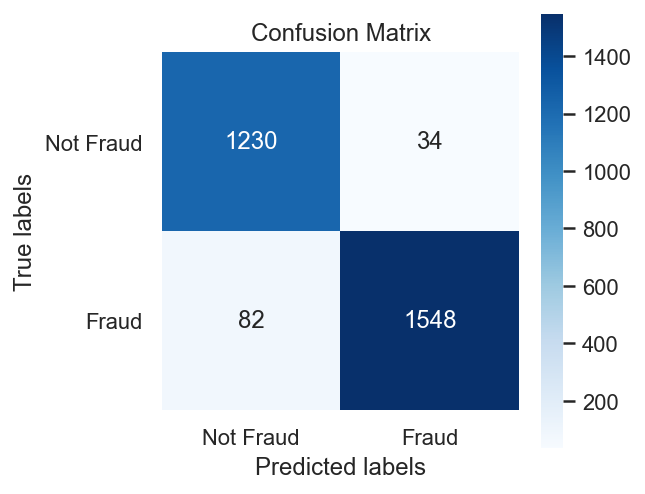

In [29]:


df9 = dataset.copy()

df9 = df9.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X9 = df9.loc[:, features_list]
y9 = df9.loc[:, 'FraudFound_P'].values.ravel()

X9.Sex = np.where(X9.Sex == 'Male', 1, 0)
X9 = pd.get_dummies(X9, drop_first=True)

#### Over-sampling using SMOTE and cleaning using ENN (Edited Nearest Neighbours) algorithm
X9_resampled, y9_resampled = SMOTEENN(random_state=3).fit_resample(X9, y9)

X9_train, X9_test, y9_train, y9_test = train_test_split(X9_resampled,
                                                       y9_resampled,
                                                        test_size=.2,stratify=y9_resampled,
                                                        random_state=101)

print(1)
RC = RandomForestClassifier(n_estimators=100, max_features=10, random_state=50)

print(2)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RC, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)
print(3)
# Fit the random search model
#RC.fit(X9_train, y9_train)

rf_random.fit(X9_train, y9_train)

rf_random.best_params_

printScores(rf_random, X9_test, y9_test)

In [ ]:
plt.figure(figsize=(10, 30))
perm_importance2 = permutation_importance(RC, X3_test, y3_test)
sorted_idx = perm_importance2.importances_mean.argsort()
plt.barh(X3_test.columns[sorted_idx], perm_importance2.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# xgboost - GradientBoostedTrees
>some of the features with Over-sampling using SMOTE

C:\Users\aso19\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


Accuracy 0.966
XGBClassifier on Test Data; Test F1: 0.969, Test AUC: 0.992, Log-Loss: 0.106

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1264
           1       0.98      0.96      0.97      1630

    accuracy                           0.97      2894
   macro avg       0.96      0.97      0.97      2894
weighted avg       0.97      0.97      0.97      2894



<Figure size 900x600 with 0 Axes>

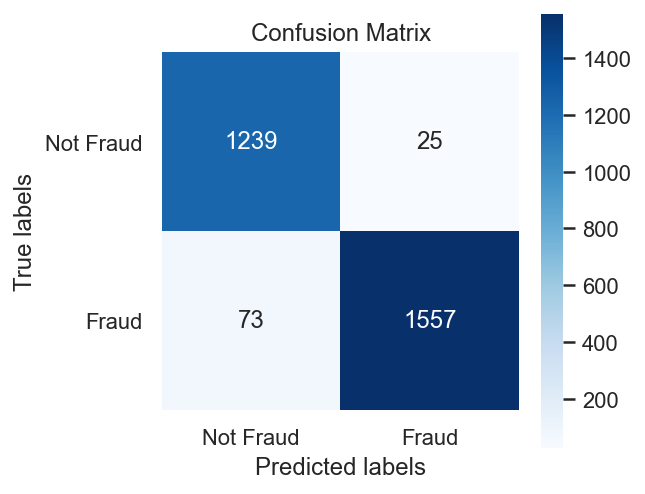

In [30]:
df7 = dataset.copy()

df7 = df7.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X7 = df7.loc[:, features_list]
y7 = df7.loc[:, 'FraudFound_P'].values.ravel()

X7.Sex = np.where(X7.Sex == 'Male', 1, 0)
X7 = pd.get_dummies(X7, drop_first=True)



#### Over-sampling using SMOTE and cleaning using ENN (Edited Nearest Neighbours) algorithm
X7_resampled, y7_resampled = SMOTEENN(random_state=3).fit_resample(X7, y7)

X7_train, X7_test, y7_train, y7_test = train_test_split(X7_resampled,
                                                       y7_resampled,
                                                        test_size=.2,stratify=y7_resampled,
                                                        random_state=101)



gbm = xgboost.XGBClassifier(
    n_estimators=30000,
    max_depth=4,
    objective='binary:logistic',  #new objective
    learning_rate=.05,
    subsample=.8,
    min_child_weight=3,
    colsample_bytree=.8,
    use_label_encoder=False)

eval_set = [(X7_train, y7_train), (X7_test, y7_test)]
fit_model = gbm.fit(
    X7_train,
    y7_train,
    eval_set=eval_set,
    eval_metric=
    'error',  #new evaluation metric: classification error (could also use AUC, e.g.)
    early_stopping_rounds=50,
    verbose=False)

print('Accuracy %.3f' % accuracy_score(
    y7_test, gbm.predict(X7_test, ntree_limit=gbm.best_ntree_limit)))
printScores(gbm, X7_test, y7_test)


score_results['GradientBoostedTrees'] = gbm.score(X7_test, y7_test)
f1_score_dict['GradientBoostedTrees'] = f1_score(y7_test, gbm.predict(X7_test))

In [47]:
#figsize(5,20)
#xgboost.plot_importance(gbm)
#xgboost.plot_importance(gbm, importance_type='gain')

# Support Vector Machine
>some of the features with Over-sampling using SMOTE

SVC on Test Data; Test F1: 0.984, Test AUC: 0.996, Log-Loss: 0.053

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1620
           1       0.97      1.00      0.98      2144

    accuracy                           0.98      3764
   macro avg       0.98      0.98      0.98      3764
weighted avg       0.98      0.98      0.98      3764



<Figure size 900x600 with 0 Axes>

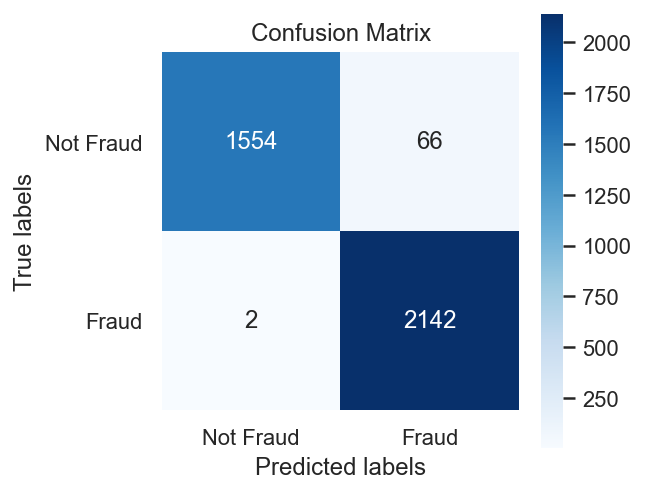

In [12]:
from sklearn.svm import SVC


df20 = dataset.copy()

df20 = df20.dropna()

features_list = [
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
    'BasePolicy', 'ClaimSize'
]

X20 = df20.loc[:, features_list]
y20 = df20.loc[:, 'FraudFound_P'].values.ravel()

X20.Sex = np.where(X20.Sex == 'Male', 1, 0)
X20 = pd.get_dummies(X20, drop_first=True)

# Linear dimensionality reduction using Singular Value Decomposition
pca = PCA(n_components='mle', whiten='True')
X20 = pca.fit(X20).transform(X20)

#### Over-sampling using SMOTE and cleaning using ENN (Edited Nearest Neighbours) algorithm
X20_resampled, y20_resampled = SMOTEENN(random_state=3).fit_resample(X20, y20)

X20_train, X20_test, y20_train, y20_test = train_test_split(X20_resampled,
                                                       y20_resampled,
                                                        test_size=.2,stratify=y20_resampled,
                                                        random_state=101)

svm = SVC(kernel='rbf', C=200, probability=True)
svm.fit(X20_train, y20_train)
printScores(svm, X20_test, y20_test, logLoss=True)


score_results['SupportVectorMachine'] = svm.score(X20_test, y20_test)
f1_score_dict['SupportVectorMachine'] = f1_score(y20_test, svm.predict(X20_test))


# Comparing Models

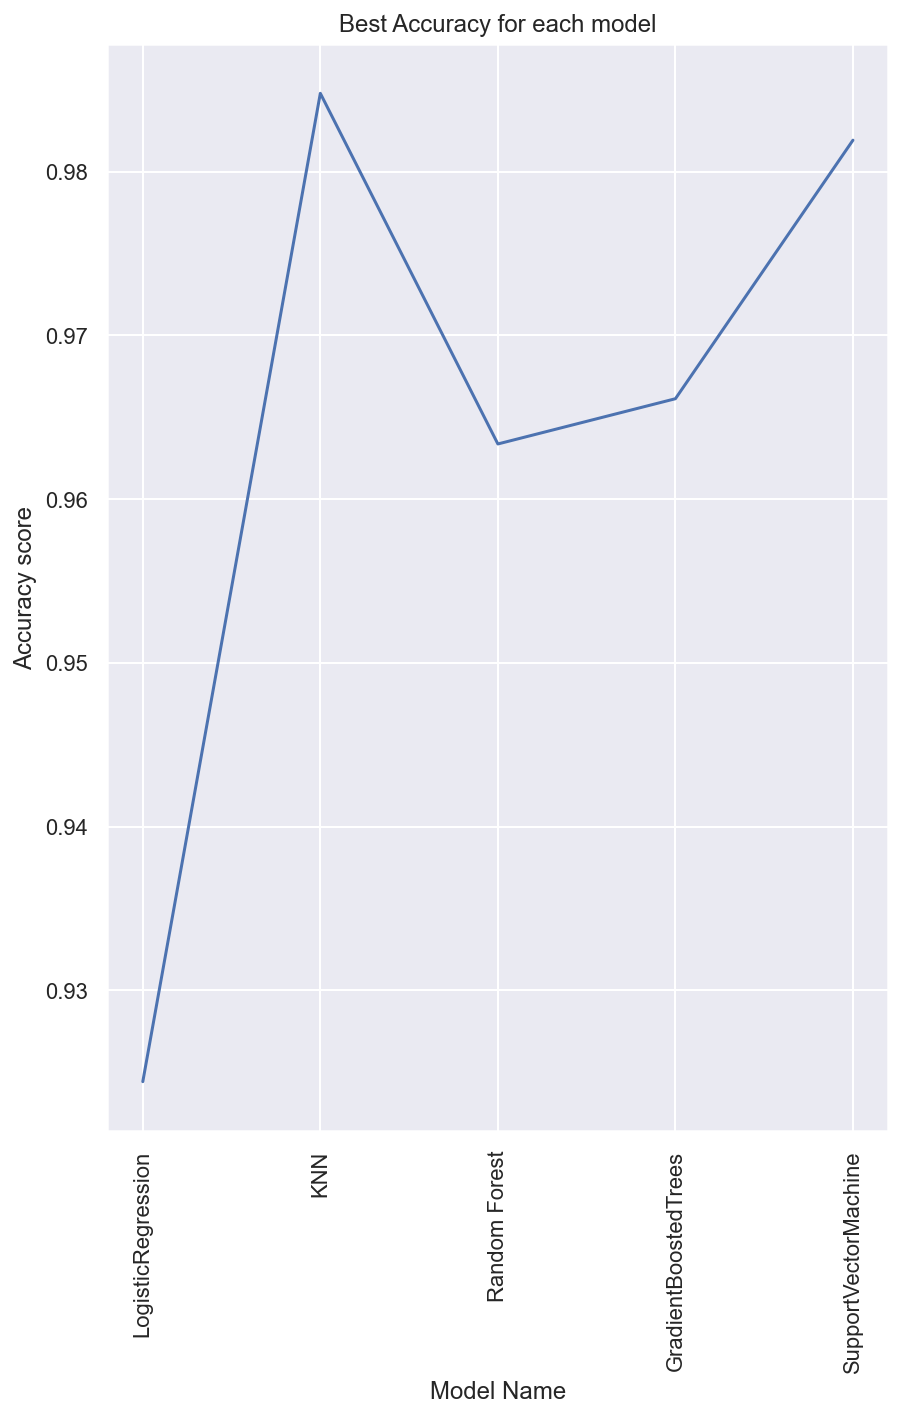

In [45]:
plt.plot(score_results.keys(),score_results.values())
plt.ylabel("Accuracy score")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.title("Best Accuracy for each model");
figsize(7,7)

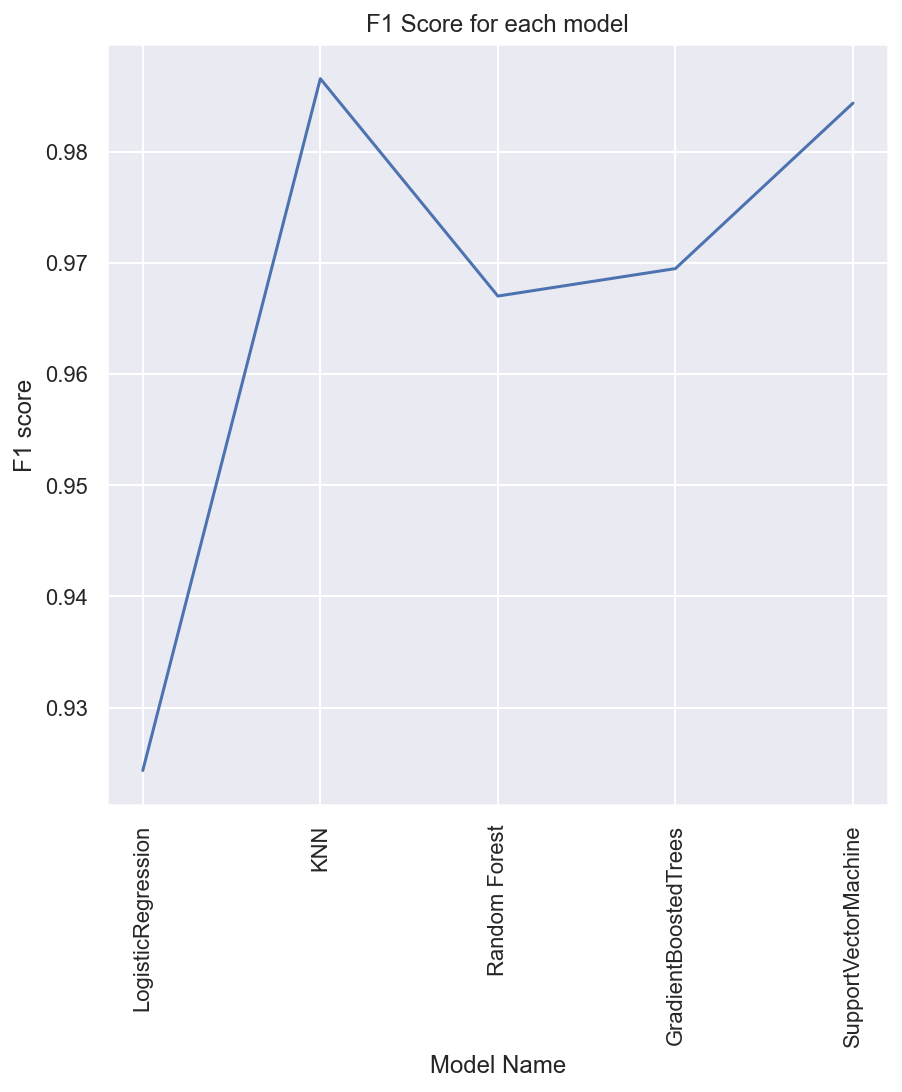

In [46]:
plt.plot(f1_score_dict.keys(),f1_score_dict.values())
plt.ylabel("F1 score")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.title("F1 Score for each model");
figsize(7,7)